In [15]:
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt

In [16]:
mag_dir = r'N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\nii files\FLINT_SOT_NII_CORRECTED_AFFINE'
seg_dir = r'N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\nii files\FLINT_SOT_WHOLE_LIVER_MASKS_NII'

In [152]:
case_id = 'f_7341'

In [153]:
mag_ni = nib.load(os.path.join(mag_dir, case_id + '_SOT.nii'))
seg_ni = nib.load(os.path.join(seg_dir, case_id + '_SOT_whole_liver.nii'))

mag = np.rot90(np.flip(mag_ni.get_fdata(), 0))
seg = np.rot90(np.flip(seg_ni.get_fdata(), 0))

case_id, mag.shape, seg.shape

('f_7341', (224, 224, 22), (224, 224, 22))

<function matplotlib.pyplot.show(close=None, block=None)>

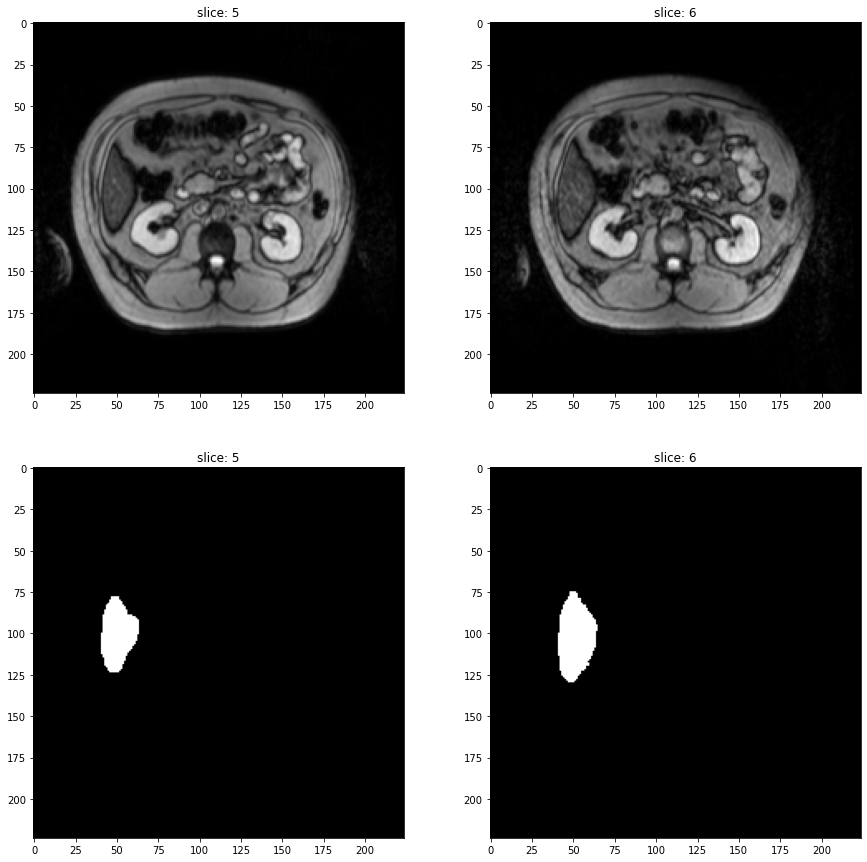

In [154]:
index = 5

fig = plt.figure(figsize=(15,15))

fig.add_subplot(2, 2, 1)
plt.imshow(mag[:,:,index],cmap='gray')
plt.title('slice: %d' % (index))
fig.add_subplot(2, 2, 2)
plt.imshow(mag[:,:,index+1],cmap='gray')
plt.title('slice: %d' % (index+1))
fig.add_subplot(2, 2, 3)
plt.imshow(seg[:,:,index],cmap='gray')
plt.title('slice: %d' % (index))
fig.add_subplot(2, 2, 4)
plt.imshow(seg[:,:,index+1],cmap='gray')
plt.title('slice: %d' % (index+1))

plt.show

In [155]:
ps_x, ps_y, slice_thickness = mag_ni.affine[0][0], mag_ni.affine[1][1], mag_ni.affine[2][2]
voxel_volume = ps_x * ps_y * slice_thickness
error_volume = ps_x * ps_y * (1/2 * slice_thickness)

print('voxel spacing x: ', ps_x)
print('voxel spacing y: ', ps_y)
print('slice thickness: ', slice_thickness)
print('voxel volume:    ', voxel_volume)
print('error volume:    ', error_volume)

voxel spacing x:  2.232142925262451
voxel spacing y:  1.8833706378936768
slice thickness:  10.0
voxel volume:     42.039524450214
error volume:     21.019762225107


In [156]:
slice1 = seg[:,:,index]
slice2 = seg[:,:,index+1]

roi1 = slice1.sum()
roi2 = slice2.sum()
avg_roi = (roi1 + roi2) / 2
tot_vol = (seg.sum() * voxel_volume) / 1000
error = (((avg_roi * error_volume) / 1000) / tot_vol) * 100

print('case id:         ', case_id)
print('error:           ', error)
print('slices:          ', index, index+1)
print('voxel spacing x: ', ps_x)
print('voxel spacing y: ', ps_y)
print('slice thickness: ', slice_thickness)
print('voxel volume:    ', voxel_volume)
print('error volume:    ', error_volume)
print('roi 1:           ', roi1)
print('roi 2:           ', roi2)
print('avg roi:         ', avg_roi)
print('tot volume:      ', tot_vol)
print('error:           ', error)

case id:          f_7341
error:            0.7197746792308494
slices:           5 6
voxel spacing x:  2.232142925262451
voxel spacing y:  1.8833706378936768
slice thickness:  10.0
voxel volume:     42.039524450214
error volume:     21.019762225107
roi 1:            731.0
roi 2:            925.0
avg roi:          828.0
tot volume:       2418.029367327409
error:            0.7197746792308494


<function matplotlib.pyplot.show(close=None, block=None)>

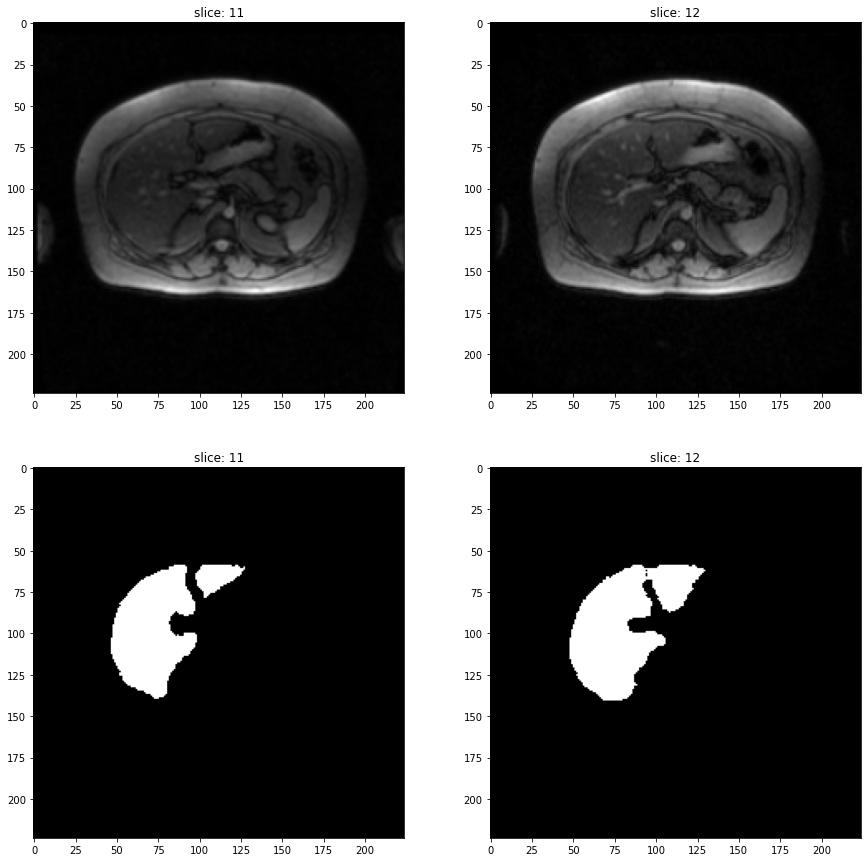

In [71]:
###
### FOR MULTIPLE STITCHES RUN THIS CODE AND THE COMBINED ERROR
###


index1 = 11

fig = plt.figure(figsize=(15,15))

fig.add_subplot(2, 2, 1)
plt.imshow(mag[:,:,index1],cmap='gray')
plt.title('slice: %d' % (index1))
fig.add_subplot(2, 2, 2)
plt.imshow(mag[:,:,index1+1],cmap='gray')
plt.title('slice: %d' % (index1+1))
fig.add_subplot(2, 2, 3)
plt.imshow(seg[:,:,index1],cmap='gray')
plt.title('slice: %d' % (index1))
fig.add_subplot(2, 2, 4)
plt.imshow(seg[:,:,index1+1],cmap='gray')
plt.title('slice: %d' % (index1+1))

plt.show

In [72]:
slice3 = seg[:,:,index1]
slice4 = seg[:,:,index1+1]

roi3 = slice3.sum()
roi4 = slice4.sum()
avg_roi1 = (roi3 + roi4) / 2
error1 = (((avg_roi1 * error_volume) / 1000) / tot_vol) * 100

print('case id: ', case_id)
print('slices:  ', index, index+1)
print('roi 3:   ', roi3)
print('roi 4:   ', roi4)
print('avg roi: ', avg_roi1)
print('tot volume: ', tot_vol)
print('error:      ', error)

case id:  f_4336
slices:   5 6
roi 3:    3096.0
roi 4:    3571.0
avg roi:  3333.5
tot volume:  2382.5635223333957
error:       1.1904263995482964


In [73]:
avg_roi_combined = avg_roi + avg_roi1
error = (((avg_roi_combined * error_volume) / 1000) / tot_vol) * 100


print('case id: ', case_id)
print('error:      ', error)
print('slices:  ', index, index+1, index1, index1+1)
print('voxel spacing x: ', ps_x)
print('voxel spacing y: ', ps_y)
print('slice thickness: ', slice_thickness)
print('voxel volume:    ', voxel_volume)
print('error volume:    ', error_volume)
print('roi 1:   ', roi1)
print('roi 2:   ', roi2)
print('avg roi: ', avg_roi)
print('roi 3:   ', roi3)
print('roi 4:   ', roi4)
print('avg roi: ', avg_roi1)
print('tot volume: ', tot_vol)
print('error:      ', error)

case id:  f_4336
error:       4.675965620360108
slices:   5 6 11 12
voxel spacing x:  2.232142925262451
voxel spacing y:  2.232142925262451
slice thickness:  10.0
voxel volume:     49.82462038799213
error volume:     24.912310193996063
roi 1:    1008.0
roi 2:    1269.0
avg roi:  1138.5
roi 3:    3096.0
roi 4:    3571.0
avg roi:  3333.5
tot volume:  2382.5635223333957
error:       4.675965620360108
